In [5]:
from polys import *
from pprint import pprint as pp

with open("netlib/icosahedron.netlib") as dat:
    icosa = read_netlib(dat)
with open("../polyhedra/netlib_polyhedra/p3.txt") as dat:
    dodeca = read_netlib(dat)
with open("../polyhedra/netlib_polyhedra/p0.txt") as dat:
    tetra = read_netlib(dat)
netlib = []
for i in range(142):
    with open(f"../polyhedra/netlib_polyhedra/p{i}.txt") as dat:
        netlib.append(read_netlib(dat))

In [6]:
if 0:
    for i in range(142):
        with open(f"../polyhedra/netlib_polyhedra/p{i}.txt") as dat:
            poly = read_netlib(dat)
            print(f"{i}: {poly.name}")
            #wire_frame(sit_polyhedron(poly), width=100, height=100, debug_origin=True)

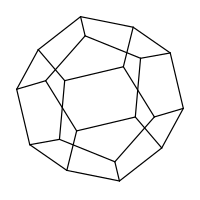

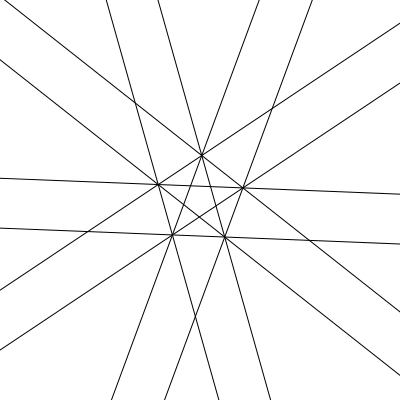

In [7]:
poly = netlib[3]
wire_frame(poly)
stellation_diagram(poly)

In [8]:
if 0:
    poly = netlib[135]
    for i in range(len(poly.faces)):
        stellation_diagram(poly, i)

In [9]:
from IPython.display import HTML

In [10]:
ico = netlib[4]
HTML(x3dom_html(center_polyhedron(netlib[135])))